In [69]:
import pandas as pd


In [71]:
dados = pd.read_csv('insurance.csv') #arquivo copiado do link: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [72]:
dados.shape # dimensionalidade e tamanho do dataset

(1338, 7)

In [73]:
dados.info() # verificar os tipos de dados das colunas, ja sabemos que as colunas não numéricas devem ser tratadas posteriormente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
dados.head() # leitura das primeiras 5 linhas do dataset para se ter ideia do dados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
dados.isnull().sum() #validar se possui dados nulos que precisam ser tratados

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [76]:
dados.groupby(['region']).sum() #region tem 4 valores, aplicarei a tecnica de one hot code enconding

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,12723,malemalefemalemalefemalefemalefemalefemalemale...,9452.215,339,nononononoyesnonoyesnonononononononononoyesyes...,4.343669e+06
northwest,12739,malemalefemalefemalemalefemalemalemalemalefema...,9489.930,373,nononononononononononononoyesnononoyesnononono...,4.035712e+06
southeast,14174,malemalefemalefemalefemalefemalemalemalefemale...,12141.580,382,nonononoyesnoyesnonononononoyesyesyesyesnonoye...,5.363690e+06
southwest,12823,femalemalemalemalemalefemalemalemalefemalemale...,9943.900,371,yesnononoyesnoyesyesnoyesnoyesnoyesnonononoyes...,4.012755e+06


In [77]:
from sklearn.preprocessing import LabelEncoder #aplicar labelEnconder nas colunas binárias

colunas=['sex','smoker']

for coluna in colunas:
    dados[coluna]=LabelEncoder().fit_transform(dados[coluna])

dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [78]:
#one hot enconding on regions
dummy_region = pd.get_dummies(dados['region'])
dados = pd.concat([dados, dummy_region], axis=1)
dados.drop('region', axis=1, inplace=True)
dados.head()


,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


**Analise da correlação entre as colunas**

<Axes: >

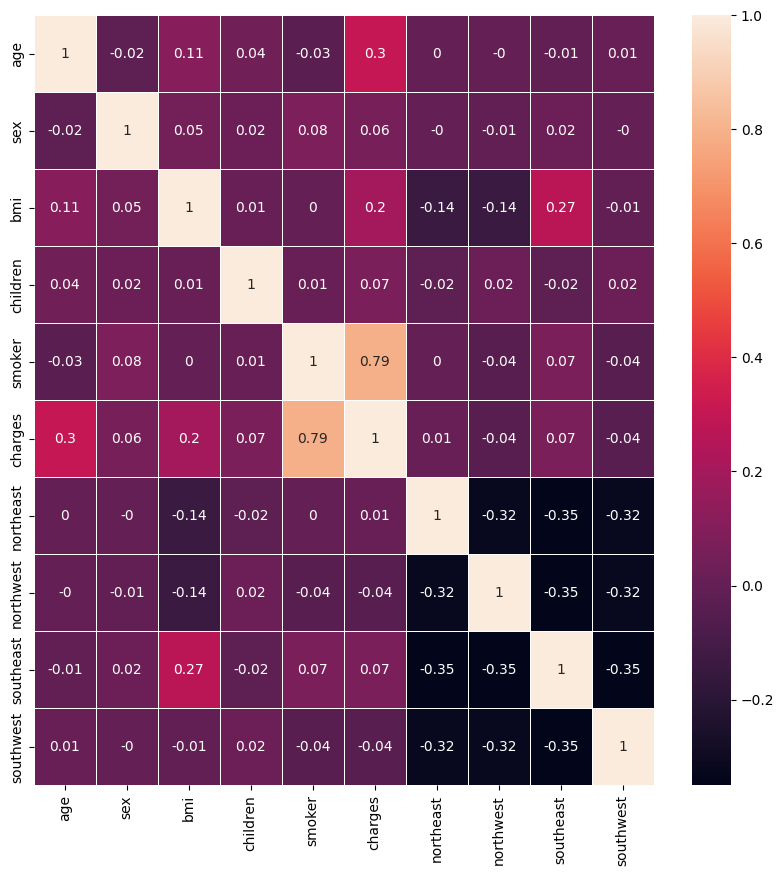

In [25]:
import matplotlib.pyplot as plt
import seaborn as sb

correlation_matrix = dados.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

* Podemos verificar que existe uma forte correlação entre valor da cobrança e se o cliente é fumante ou não

* As regiões parecem ter pouca correlação com o valor da cobrança, fortes candidatos para diminuir a dimensionalidade

<Axes: xlabel='smoker', ylabel='charges'>

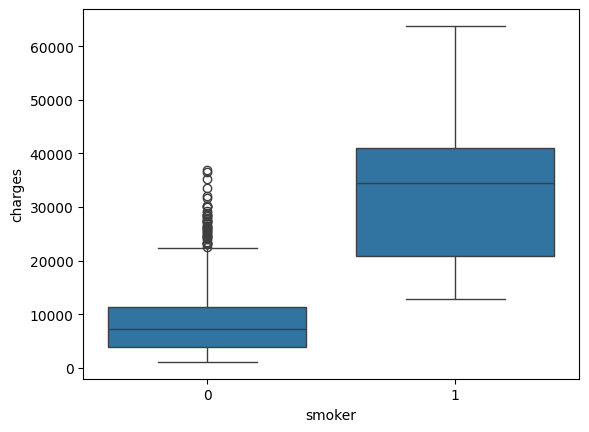

In [27]:
sb.boxplot(y='charges', x='smoker', data=dados) #Validar no gráfico a percepção que tivemos com o grafico de correlação

<Axes: xlabel='children', ylabel='charges'>

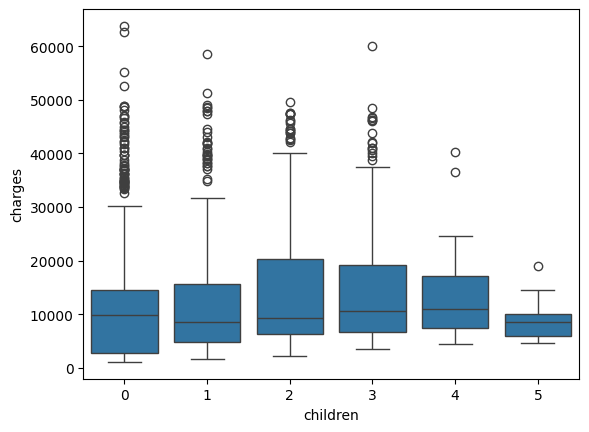

In [28]:
sb.boxplot(y='charges', x='children', data=dados) #interessante notar como o número de filhos parece não influenciar no valor

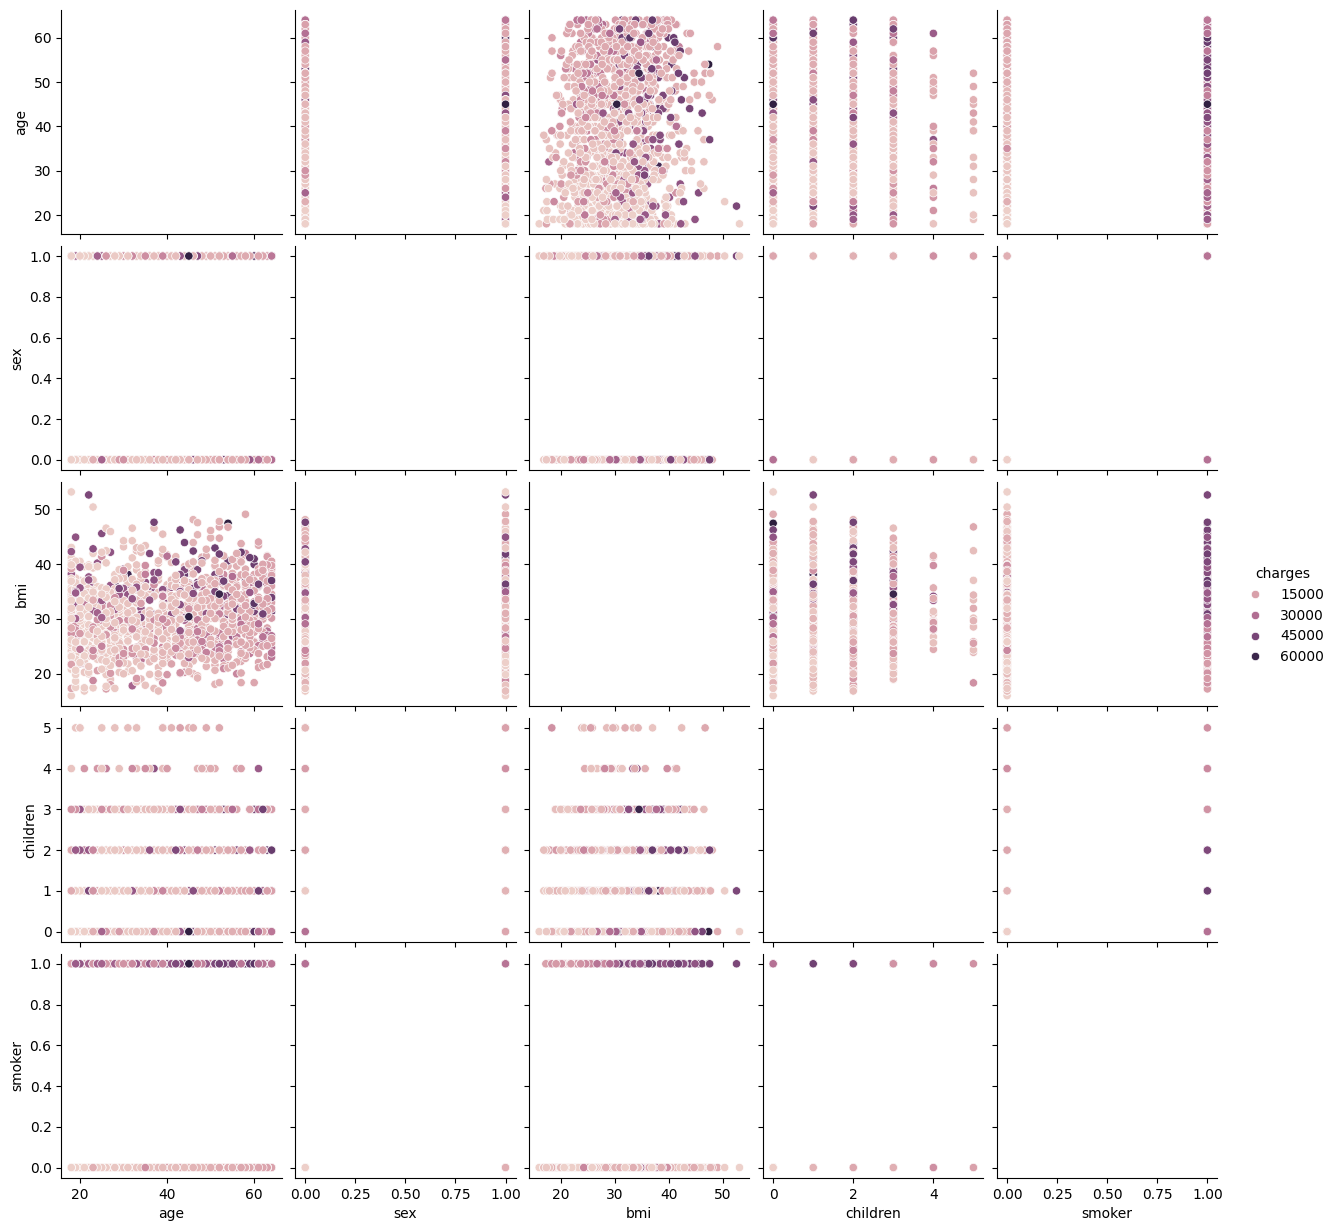

In [30]:
sb.pairplot(dados, vars=['age', 'sex', 'bmi', 'children', 'smoker'], hue='charges') #analisar todas as features com as faixas de valor da cobrança

Podemos verificar que todas as características cruzadas com quem é fumante aumenta o valor a ser pago

In [32]:
#Começar o treinamento com as variáveis selecionadas

x = dados[["age", "sex", "bmi", "children", "smoker"]]
y = dados["charges"]


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
x_train.shape

(1070, 5)

In [43]:
x_test.shape

(268, 5)

In [44]:
#padronização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_escalonado = scaler.fit_transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [39]:
import numpy as np

In [53]:
lr = LinearRegression()
lr.fit(x_train_escalonado, y_train)
y_pred = lr.predict(x_test_escalonado)

In [58]:
r_sq = lr.score(x_test_escalonado, y_test)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.7811302113434097


In [60]:
print('intercept:', lr.intercept_)

intercept: 13346.089736364485


In [62]:
coefficients = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,age,3616.287289
1,sex,-3.974720
2,bmi,1978.486168
3,children,519.291478
4,smoker,9559.602692


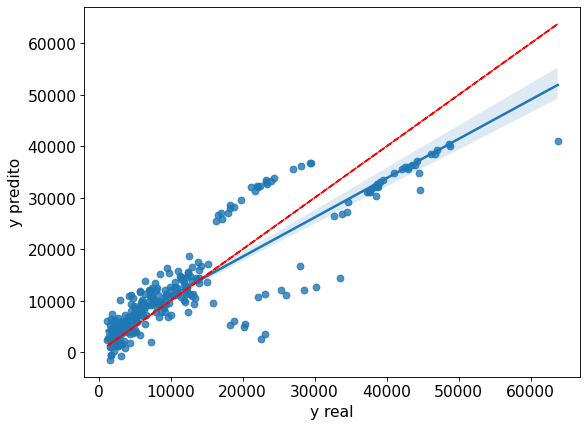

In [63]:
fig = plt.figure(figsize=(8, 6), dpi=80)
plt.rcParams.update({'font.size': 14})
ax = sb.regplot(x = y_test, y = y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

Validação de performance

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)


MAE 4213.4847978071375
MSE 33979257.050808206
r² 0.7811302113434097


Testando o Modelo de Árvore de Decisão

In [66]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train_escalonado, y_train)
y_pred_dtr = model_dtr.predict(x_test_escalonado)

In [68]:
# Avaliando o modelo
MAE = mean_absolute_error(y_test, y_pred_dtr)
MSE = mean_squared_error(y_test, y_pred_dtr)
r2 = r2_score(y_test, y_pred_dtr)
print('MAE',MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
print('MSE',MSE) # Erro Quadrático Médio (MSE) é a média dos erros quadráticos
print('r²',r2) # (R-quadrado)

MAE 3164.0404294179107
MSE 46999179.010378994
r² 0.6972652944808799


**o modelo de regressão linear apresentou melhor resultado e será o escolhido para ser utilizado**